# Model Training

## 1.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# %pip install catboost

In [2]:
# Basic import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [3]:
df = pd.read_csv('data\exams_performance.csv')

<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
C:\Users\HP\AppData\Local\Temp\ipykernel_11448\577918159.py:1: SyntaxWarning: invalid escape sequence '\e'
  df = pd.read_csv('data\exams_performance.csv')


In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


## Preparing x and y variables

In [5]:
x = df.drop(columns=['math score'], axis=1)

In [6]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group D,some college,standard,completed,70,78
1,male,group D,associate's degree,standard,none,93,87
2,female,group D,some college,free/reduced,none,76,77
3,male,group B,some college,free/reduced,none,70,63
4,female,group D,associate's degree,standard,none,85,86


In [7]:
y = df['math score']

In [8]:
y.head()

0    59
1    96
2    57
3    70
4    83
Name: math score, dtype: int64

In [9]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [10]:
# Features
print("Categories in 'gender' variable:  ", end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:  ", end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:  ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:  ", end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:   ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group D' 'group B' 'group C' 'group E' 'group A']
Categories in 'parental level of education' variable:   ['some college' "associate's degree" 'some high school'
 "bachelor's degree" "master's degree" 'high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in 'test preparation course' variable:   ['completed' 'none']


In [11]:
# Create column transformer with 3 type of transformers
num_features = x.select_dtypes(exclude='object').columns
cat_features = x.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [12]:
x =preprocessor.fit_transform(x)

In [13]:
x.shape

(1000, 19)

In [14]:
# Separate dataset into trian and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [15]:
df.shape

(1000, 8)

In [16]:
x_train.shape, x_test.shape

((800, 19), (200, 19))

## Create an evaluate function to give all metrics after model training

In [17]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [43]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGB Regressor": XGBRegressor(),
    "Cat Boost Regressor": CatBoostRegressor(verbose=False),
    "Ada Boost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range (len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model
    
    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluate train and test dataset
    model_train_mae, model_rain_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse,  model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for training set')
    print("- Root Mean Squard Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')


Linear Regression
Model performance for training set
- Root Mean Squard Error: 4.9951
- Mean Absolute Error: 4.0735
- R2 Score: 0.8870


Lasso
Model performance for training set
- Root Mean Squard Error: 6.8090
- Mean Absolute Error: 5.3757
- R2 Score: 0.7900


Ridge
Model performance for training set
- Root Mean Squard Error: 4.9874
- Mean Absolute Error: 4.0732
- R2 Score: 0.8873


K-Neighbors Regressor
Model performance for training set
- Root Mean Squard Error: 6.4764
- Mean Absolute Error: 5.1560
- R2 Score: 0.8100


Decision Tree
Model performance for training set
- Root Mean Squard Error: 7.5693
- Mean Absolute Error: 5.9850
- R2 Score: 0.7405


Random Forest Regressor
Model performance for training set
- Root Mean Squard Error: 5.7237
- Mean Absolute Error: 4.6093
- R2 Score: 0.8516


XGB Regressor
Model performance for training set
- Root Mean Squard Error: 6.1960
- Mean Absolute Error: 5.0672
- R2 Score: 0.8261


Cat Boost Regressor
Model performance for training set
- Root M

## Results

In [48]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending=False)

,Model Name,R2_Score
2,Ridge,0.887328
0,Linear Regression,0.886980
7,Cat Boost Regressor,0.874470
5,Random Forest Regressor,0.851602
8,Ada Boost Regressor,0.829976
6,XGB Regressor,0.826102
3,K-Neighbors Regressor,0.810005
1,Lasso,0.789992
4,Decision Tree,0.740469


## Linear Regression

In [52]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred =lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f"%score)

Accuracy of the model is 88.70


## Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

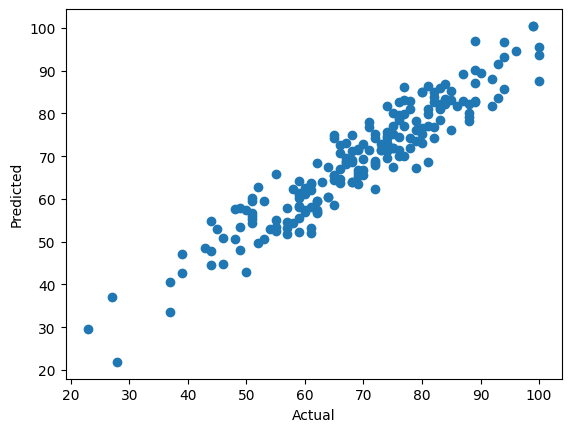

In [54]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<Axes: xlabel='math score'>

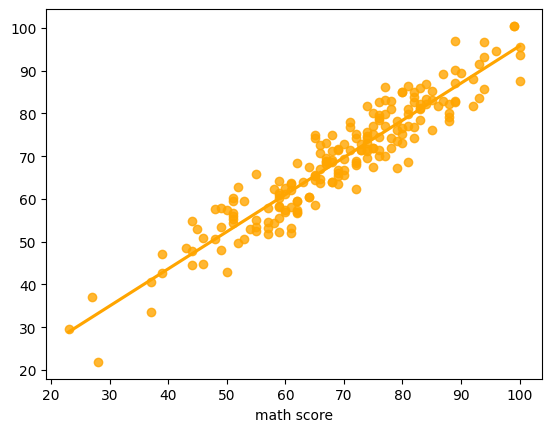

In [58]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='orange')

# Difference between actual and predicted values

In [59]:
pred_df = pd.DataFrame({'Actual values': y_test, 'Predicted values': y_pred, 'Difference': y_test-y_pred})
pred_df

,Actual values,Predicted values,Difference
521,67,68.250000,-1.250000
737,78,81.156250,-3.156250
740,39,42.765625,-3.765625
660,70,69.375000,0.625000
411,90,89.406250,0.593750
...,...,...,...
408,100,87.515625,12.484375
332,66,70.718750,-4.718750
208,66,63.718750,2.281250
613,68,64.078125,3.921875
